### **Import Libraries**

In [26]:
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path
import os 
from matplotlib import font_manager 
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### **Set Paths**

In [27]:
github_folder = str(Path(os.getcwd()).parent.parent.absolute())
github_folder

'/Users/ppower1/Documents/GitHub'

### **Style**

In [28]:
locations = github_folder + '/evictions/styles/Newsreader'
font_files = font_manager.findSystemFonts(fontpaths=locations)
print(locations)
print(font_files[0])
for f in font_files: 
    font_manager.fontManager.addfont(f)
plt.rcParams["font.family"] = "Newsreader"

/Users/ppower1/Documents/GitHub/evictions/styles/Newsreader
/Users/ppower1/Documents/GitHub/evictions/styles/Newsreader/static/Newsreader_60pt/Newsreader_60pt-ExtraBoldItalic.ttf


### **Read in Data**

In [29]:
df = pd.read_csv("./../data/GDP.csv")
df['observation_date'] = pd.to_datetime(df['observation_date'])
df = df[df['observation_date'].dt.month == 7]
df['year'] = df['observation_date'].dt.year 

df1 = pd.read_csv("./../data/FYFSD.csv")
df1['observation_date'] = pd.to_datetime(df1['observation_date'])
df1['year'] = df1['observation_date'].dt.year 
df = pd.merge(df, df1, how='left', on='year')
df.head()


,observation_date_x,GDP,year,observation_date_y,FYFSD
0,1947-07-01,249.585,1947,1947-06-30,4018
1,1948-07-01,279.196,1948,1948-06-30,11796
2,1949-07-01,272.889,1949,1949-06-30,580
3,1950-07-01,308.153,1950,1950-06-30,-3119
4,1951-07-01,351.385,1951,1951-06-30,6102


#### **Convert to Billions**

In [30]:
df['FYFSD'] =  df['FYFSD'].abs() / 1000
df['Ratio'] = (df['FYFSD'] / df['GDP'])*100

### **Plot**

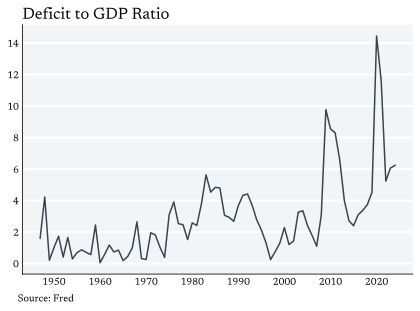

In [31]:
fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)

# Set the facecolor directly on the existing axes
ax.set_facecolor((.95, .96, .97))
ax.xaxis.set_tick_params(length=0, labeltop=False, labelbottom=True)

for key in 'right', 'top':
    ax.spines[key].set_visible(False)

ax.yaxis.set_tick_params(length=0)
ax.yaxis.grid(True, color='white', linewidth=2)
ax.set_axisbelow(True)

plt.plot(df['year'],df['Ratio'], color='#36454F')

plt.title('Deficit to GDP Ratio', loc='left', size=16)
ax.text(0.06, -0.1, 'Source: Fred', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

fig.savefig('./../figures/deficit_to_gdp.png')
plt.show()